<h1>Fake News</h1>

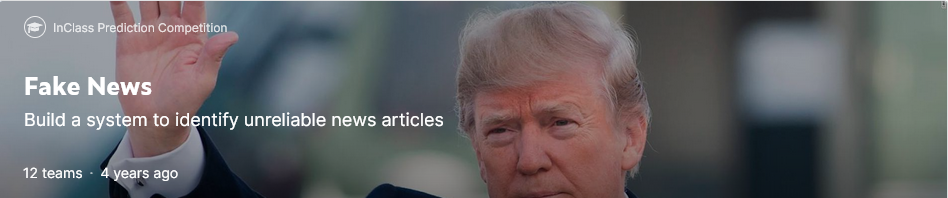

source: https://www.kaggle.com/c/fake-news/ <br/>
data :https://www.kaggle.com/c/fake-news/data

<h2>Problem Statement</h2>

Develop a machine learning program to identify when an article might be fake news. 
Run by the UTK Machine Learning Club.

<h2>Data Description</h2>

In [1]:
#loading data
import pandas as pd

In [26]:
df=pd.read_csv('data/train.csv')

In [27]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [29]:
df.shape

(20800, 5)

train.csv: A full training dataset with the following attributes:

    1.id: unique id for a news article
    2.title: the title of a news article
    3.author: author of the news article
    4.text: the text of the article; could be incomplete
    5.label: a label that marks the article as potentially unreliable
            1: unreliable
            0: reliable


In [30]:
#checking if dataframe have null values or not
df.isnull().values.any()

True

In [31]:
#dropping the null values 
df=df.dropna()

In [32]:
#copy to another variable
messages=df.copy()

In [33]:
#resetting index after dropping null value rows
messages.reset_index(inplace=True)

In [34]:
messages.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [35]:
messages.shape

(18285, 6)

we had (20800-18285) null values rows which is dropped now.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer

In [18]:
#decontract the words

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [51]:
# preprocessing title and text and building the word corpus

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from tqdm import tqdm

ps = PorterStemmer()
corpus = []
for i in tqdm(range(0, len(messages))):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

100%|############################################################################| 18285/18285 [04:14<00:00, 71.78it/s]


In [52]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000, ngram_range=(1,3))
X=cv.fit_transform(corpus).toarray()

In [53]:
X.shape

(18285, 5000)

In [55]:
y=messages['label']

In [56]:
##Divide the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [57]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [58]:
len(corpus)

18285

In [59]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [60]:
count_df=pd.DataFrame(X_train,columns=cv.get_feature_names())

In [61]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [62]:
import matplotlib.pyplot as plt

In [63]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Multinomial Naive Bayes

In [75]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np
import itertools

In [67]:
clf=MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [70]:
y_pred=clf.predict(X_test)

In [71]:
accuracy_score=metrics.accuracy_score(y_test,y_pred)

In [72]:
print('accuracy_score',accuracy_score)

accuracy_score 0.9019055509527755


In [73]:
conf_matrix=metrics.confusion_matrix(y_test,y_pred)

In [78]:
print(conf_matrix)

[[3044  345]
 [ 247 2399]]


In [79]:
plot_confusion_matrix(conf_matrix,classes=['Fake','Real'])

Confusion matrix, without normalization


### Hyper parameter tuning 

In [84]:
from sklearn.model_selection import StratifiedKFold,GridSearchCV

In [87]:
skf = StratifiedKFold(n_splits=10)
params = {
    'alpha':[0.001,0.01,0.1,0,1,10,100]
}
nb = MultinomialNB()
gs = GridSearchCV(nb, cv=skf, param_grid=params,verbose=2, return_train_score=True)

gs.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV] END ........................................alpha=0.001; total time=   1.3s
[CV] END ........................................alpha=0.001; total time=   1.4s
[CV] END ........................................alpha=0.001; total time=   1.5s
[CV] END ........................................alpha=0.001; total time=   1.4s
[CV] END ........................................alpha=0.001; total time=   1.3s
[CV] END ........................................alpha=0.001; total time=   1.3s
[CV] END ........................................alpha=0.001; total time=   1.2s
[CV] END ........................................alpha=0.001; total time=   1.3s
[CV] END ........................................alpha=0.001; total time=   1.2s
[CV] END ........................................alpha=0.001; total time=   1.3s
[CV] END .........................................alpha=0.01; total time=   1.2s
[CV] END .......................................

C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


[CV] END ............................................alpha=0; total time=   1.3s


C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


[CV] END ............................................alpha=0; total time=   1.3s


C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


[CV] END ............................................alpha=0; total time=   1.3s


C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


[CV] END ............................................alpha=0; total time=   1.3s


C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


[CV] END ............................................alpha=0; total time=   1.2s


C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


[CV] END ............................................alpha=0; total time=   1.5s


C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


[CV] END ............................................alpha=0; total time=   1.6s


C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


[CV] END ............................................alpha=0; total time=   1.5s


C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


[CV] END ............................................alpha=0; total time=   1.7s


C:\Users\navin.prasad\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


[CV] END ............................................alpha=0; total time=   1.3s
[CV] END ............................................alpha=1; total time=   1.2s
[CV] END ............................................alpha=1; total time=   1.4s
[CV] END ............................................alpha=1; total time=   1.5s
[CV] END ............................................alpha=1; total time=   1.4s
[CV] END ............................................alpha=1; total time=   1.4s
[CV] END ............................................alpha=1; total time=   1.3s
[CV] END ............................................alpha=1; total time=   1.2s
[CV] END ............................................alpha=1; total time=   1.3s
[CV] END ............................................alpha=1; total time=   1.2s
[CV] END ............................................alpha=1; total time=   1.3s
[CV] END ...........................................alpha=10; total time=   1.3s
[CV] END ...................

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=MultinomialNB(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0, 1, 10, 100]},
             return_train_score=True, verbose=2)

In [88]:
gs.best_estimator_

MultinomialNB(alpha=0.1)

In [89]:
gs.best_params_

{'alpha': 0.1}

In [90]:
clf_final=MultinomialNB(alpha=0.1)
clf_final.fit(X_train,y_train)

MultinomialNB(alpha=0.1)

In [91]:
y_pred=clf_final.predict(X_test)

In [92]:
print('accuracy_score',metrics.accuracy_score(y_test,y_pred))

accuracy_score 0.9020712510356255


In [93]:
print('confusion_matrix',metrics.confusion_matrix(y_test,y_pred))

confusion_matrix [[3084  305]
 [ 286 2360]]


#### We are getting 90% accuracy with alpha=0.1 using MultinomialNB